In [19]:
#load random forest library
library(randomForest)

In [20]:
#load map count matrix
temp_samples <- read.delim('map_to_contigs.tsv')
samples <- temp_samples[2:25]
row.names(samples) <- as.vector(temp_samples[,1])

In [21]:
#set up groups "adjacent tissue" (healty) and "tumor" labels
group <- rep(c("H","T"),12)
HH <- rep(c(TRUE,FALSE),12)
TT <- rep(c(FALSE,TRUE),12)
sample_labels <- paste0(rep(c("H","T"),12),c(rbind(sprintf("%03d", c(1,2,3,4,5,6,7,9,10,11,12,13)),sprintf("%03d", c(1,2,3,4,5,6,7,9,10,11,12,13)))))
colvect <- ifelse(HH,"red","blue")


Call:
 randomForest(x = t(samples), y = as.factor(group), ntree = 5000,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 5000
No. of variables tried at each split: 22

        OOB estimate of  error rate: 75%
Confusion matrix:
  H T class.error
H 3 9        0.75
T 9 3        0.75

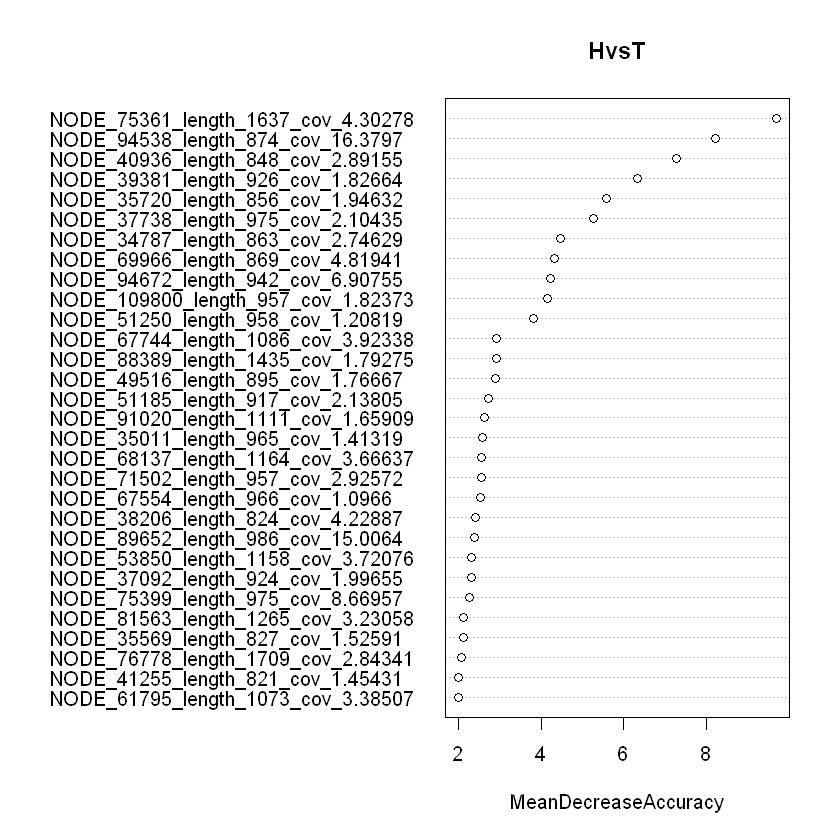

In [22]:
#first random forest, note that the OOB error rate is high
ht_rf <- randomForest(x=t(samples),y=as.factor(group), importance=TRUE, ntree=5000)
varImpPlot(ht_rf, type = 1,main="HvsT")
ht_rf


Call:
 randomForest(x = t(ht_samples2), y = as.factor(group), ntree = 500,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 7

        OOB estimate of  error rate: 25%
Confusion matrix:
  H T class.error
H 9 3        0.25
T 3 9        0.25

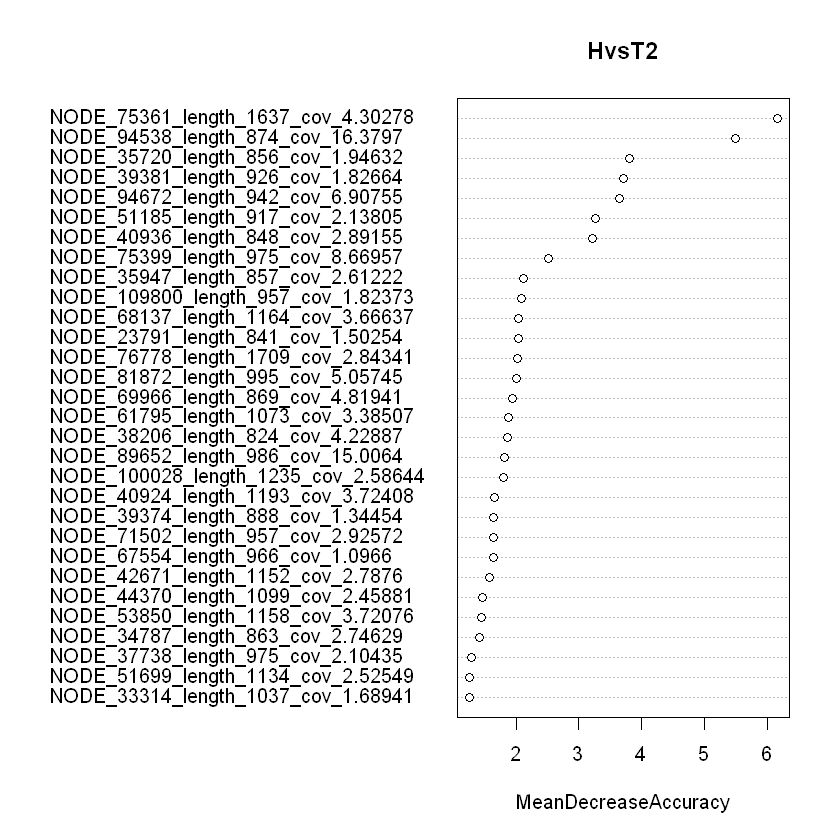

In [23]:
#take the 50 feture with greater decrease accuracy and redo the random forest
ht_samples2 <- samples[rownames(ht_rf$importance[order(ht_rf$importance[,3],decreasing = TRUE),])[1:50],]
ht_rf2 <- randomForest(x=t(ht_samples2),y=as.factor(group), importance=TRUE, ntree=500)
varImpPlot(ht_rf2, type = 1,main="HvsT2")
ht_rf2

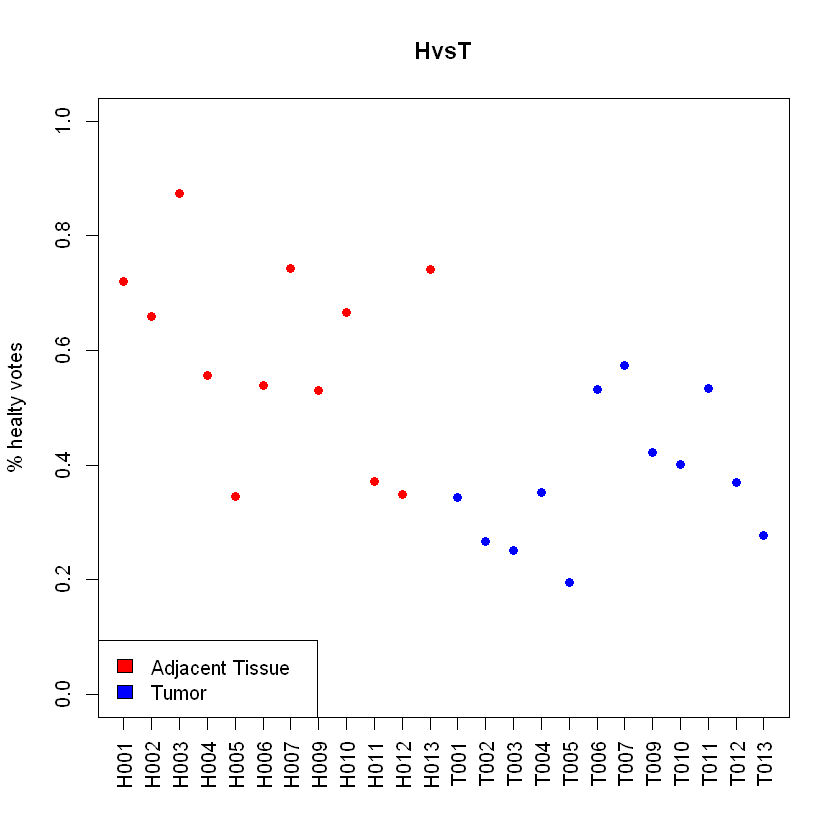

In [24]:
#print the votes proportions for the second random forest
ordered <- c(ht_rf2$votes[,1][HH],ht_rf2$votes[,1][TT]) #horder the votes to get the healty first
order_color <- c(rep("red",sum(HH)),rep("blue",sum(TT))) # same with colors
plot(ordered,col=order_color,ylim=c(0,1),main="HvsT", pch=16,xaxt='n',xlab = "",ylab = "% healty votes")
axis(1, at=1:24, labels=c(sample_labels[HH],sample_labels[TT]),las=2)
legend("bottomleft",legend=c("Adjacent Tissue","Tumor"),fill=c("red","blue"))

In [25]:
#write and print the table of the top 50 features

#reorder features according to the importance of the 2nd random forest
ht_samples3 <- samples[rownames(ht_rf2$importance[order(ht_rf2$importance[,3],decreasing = TRUE),])[1:50],]
colnames(ht_samples3)<-sample_labels
write.table(ht_samples3,file=paste0("best_hits.txt"), quote = FALSE)
ht_samples3

,H001,T001,H002,T002,H003,T003,H004,T004,H005,T005,...,H009,T009,H010,T010,H011,T011,H012,T012,H013,T013
NODE_75361_length_1637_cov_4.30278,3,2,4,2,7,0,0,0,2,1,...,3,0,3,1,0,1,1,0,7,0
NODE_94538_length_874_cov_16.3797,19,6,6,5,13,2,0,1,3,1,...,4,1,0,1,0,3,2,2,8,1
NODE_94672_length_942_cov_6.90755,69,16,12,10,50,8,4,8,8,4,...,7,10,18,6,4,5,7,10,37,3
NODE_51185_length_917_cov_2.13805,16,2,0,3,6,1,0,3,0,2,...,0,1,0,0,0,1,1,1,2,1
NODE_35720_length_856_cov_1.94632,0,0,0,0,0,0,0,0,0,0,...,0,4,0,1,0,1,0,1,0,0
NODE_39381_length_926_cov_1.82664,1,0,2,0,9,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,0
NODE_69966_length_869_cov_4.81941,43,5,7,6,34,7,6,6,14,4,...,10,7,22,12,1,14,2,7,27,6
NODE_40936_length_848_cov_2.89155,0,2,0,2,0,0,0,4,0,0,...,0,0,0,0,0,0,0,1,0,1
NODE_89652_length_986_cov_15.0064,24,20,149,21,1087,24,240,20,30,18,...,21,21,201,20,16,57,14,20,93,5
NODE_81872_length_995_cov_5.05745,58,11,2,20,29,5,0,10,2,8,...,2,3,11,4,1,10,1,2,20,0
